## Demonstration of figure finder
Before starting make sure that you have set the path where you want to dump all the figures (in shell/ff_setup, FIGURE_DUMP="your/path/here")
and run the setup script to install it: by running
> bash shell/ff_setup setup


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import figure_finder as ff



Figure finder: NO CSV FILE


First - lets make some figures and save them in the figure dump folder

scatter-demo already exists...
Overwrite ? ("o")
Skip ? ("s")
Save copy with date ? ("d")
To automatically choose one of these options edit "fig_overwrite" argument in utils.save_figure_with_tags
deleting scatter-demo


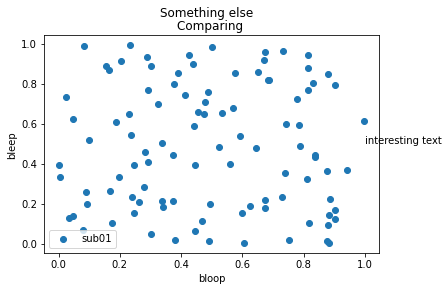

In [6]:
# scatter demo 
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x,y, label='sub01')
plt.xlabel('bloop')
plt.ylabel('bleep')
plt.title('Comparing ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')


# Now we can save the figure in the fig_dump folder
# >> we can specify the name of the file, or ff will 
# extract the title from the figure. 
# We can also specify the tags we want to save with this fig. ff will 
# automatically find *any* text in the fig (legend, axes, text) and 
# scrape these to include in the tags (so don't worry too much)
# Figure name & the date will also be saved as tags
ff.save_figure_with_tags(fig, fig_name='scatter-demo', fig_tags=['optional-tags'])
# see the function for other options (e.g., dpi, )

In [ ]:
# Make line demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

ff.save_figure_with_tags(fig, fig_name='line-demo')

Now we have 2 figures in the figure_dump folder
Lets see how these have been recorded in the database and what we can do

In [ ]:
# Figure database is a csv folder inside the figure dump folder
# > we can load this and look at the entried
fig_db = ff.load_figure_db()
fig_db

fig_db is a list of dictionaries, with each entry in the list corresponding to a particular figure
Each figure has the:
* 'date' : date that fig was saved
* 'name' : name of the file
* 'path' : path to the fig (.png file)
* 'tags' : tags - those extracted from the fig, also those which the user specified before hand. these can be used to search for your figures, (both inclusive & exclusive)
* 'cwd' : the directory where the fig was generated 
* 'nb_path' : the notebook where the figure was generated



In [ ]:
# You can see that all the text in the figure has been extracted and saved as tags...
print(fig_db[0]['tags'])
# We can use these tags to search for the figure

In [ ]:
# Now a demo search for a figure...
# both figures had the text "interesting text" - so if we search for this 2 entries come up
match_fig = ff.find_fig_with_tags(['interesting'])
print(f'Found {len(match_fig)} matching figures...')

In [ ]:
# we can refine the search using more tags
match_fig = ff.find_fig_with_tags(['interesting', 'scatter'])
print(f'Found {len(match_fig)} matching figures...')

# we can see the matching figure is the scatter plot... 
print(match_fig[0]['name'])


In [ ]:
# OR we can refine the search using by excluding certain tags
match_fig = ff.find_fig_with_tags(['interesting'], exclude=['scatter'])
print(f'Found {len(match_fig)} matching figures...')

# we can see the matching figure is NOT the scatter plot... 
print(match_fig[0]['name'])


The tags can be any text which is present in the figure (or which was specified)
It can also be the date 

In [ ]:
# We can find  out more about the matching figure in from the entries in the db (e.g., looking at name, date, nb_path)
# Or we can simply load the figure, using the same search terms 
# ff.show_fig_with_tags(['interesting'], exclude=['scatter'])

# For more detail we can print the code which was used to generate this figure...
ff.print_matching_code_file(['interesting'], exclude=['scatter'])

Note - if you try and save a figure with the same name, then it will ask you whether you want to overwrite ('o'), skip ('s') or append the date to the file name. 
You can edit the function so that it doen't ask you every time

In [ ]:
# scatter demo 
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x,y, label='sub01')
plt.xlabel('bloop')
plt.ylabel('bleep')
plt.title('Comparing ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

ff.save_figure_with_tags(fig, fig_name='scatter-demo', fig_tags=['optional-tags']) # SAME NAME AS BEFORE...

# Best practice is probably to specify a new name - but this still works....

Finally - there is the housekeeping for the database. 
If you delete a png, then you can use ff.clean_csv(), which compares the csv database to the list of png files in the folder. If they don't match it will delete the corresponding entry
This is automatically run on importing the toolbox (init file) 

You can also remove entries using the function below...

In [ ]:
ff.remove_fig_with_tags('scatter-demo_2022')

In [ ]:
ff.clean_csv()

In [ ]:
with open('/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_dump/scatter-demo.svg') as f:
    this_svg = f.read()


In [ ]:
import re
def scrape_tags_from_svg(svg_str, fig_tags=[]):
    # [1] Get date 
    start_date_mark = "<dc:date>"
    end_date_mark = "</dc:date>"
    date_result = re.search(f'{start_date_mark}(.*){end_date_mark}', svg_str)
    
    fig_tags += [date_result.group(1)]

    start_txt_mark = "<!--"
    end_txt_mark = "-->"
    txt_result = re.findall(f'{start_txt_mark}(.*){end_txt_mark}', svg_str)
    # print(txt_result.group(2))
    return txt_result
a = scrape_tags_from_svg(this_svg)    
",".join(a)

In [ ]:
svg_file = '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_dump/scatter-demo.svg'
inputfile = open(svg_file, 'r').readlines()
write_file = open(svg_file,'w')
for line in inputfile:
    write_file.write(line)
    if '<metadata>' in line:
        new_line = "blah"
        write_file.write(new_line + "\n") 
write_file.close()


def save_fig_and_code_as_svg(fig, fig_dict, cell_code_str):
    # [1] Save as svg
    fig.savefig(fig_dict['path']+'.svg', bbox_inches='tight', format='svg')

    svg_file = fig_dict['path']+'.svg'
    # [2] Create string to add to the svg...
    svg_insert = ["<annotation>"]
    svg_insert += ["*********** START - info inserted by figure finder ********"]
    svg_insert += ["***********************************************************"]
    svg_insert += ["***********************************************************"]    
    svg_insert += [f'DATE : {fig_dict["date"]}']
    svg_insert += [f'FIGURE NAME: {fig_dict["name"]}']
    svg_insert += [f'FIGURE CWD: {fig_dict["cwd"]}']
    svg_insert += [f'NOTEBOOK: {fig_dict["nb_path"]}']
    tag_str = ','.join(fig_dict['tags'])
    svg_insert += [f'TAGS: {tag_str}']
    svg_insert += ["***********************************************************"]    
    svg_insert += ["********* CODE FROM NB CELL USED TO MAKE FIG **************"]    
    svg_insert += [cell_code_str]
    svg_insert += ["***********************************************************"]
    svg_insert += ["***********************************************************"]    
    svg_insert += ["************* END - info inserted by figure finder ********"]
    svg_insert = ["</annotation>"]    
    
    svg_insert_str = '\n'.join(svg_insert)
    inputfile = open(svg_file, 'r').readlines()
    write_file = open(svg_file,'w')
    for line in inputfile:
        write_file.write(line)
        if '<metadata>' in line:
            write_file.write(svg_insert_str + "\n") 

    return

# 
# function - save svg, with code, path & tags (?) 

In [ ]:
def save_fig_and_code_as_svg(fig, ):
    # [1] Save as svg
    fig.savefig(fig_dict['path']+'.svg', bbox_inches='tight', format='svg')

    svg_file = fig_dict['path']+'.svg'
    # [2] Create string to add to the svg...
    svg_insert = ["<text>"]
    svg_insert += ["<!--"]
    svg_insert += ["*********** START - info inserted by figure finder ********"]
    svg_insert += ["***********************************************************"]
    svg_insert += ["***********************************************************"]    
    svg_insert += [f'DATE : {fig_dict["date"]}']
    svg_insert += [f'FIGURE NAME: {fig_dict["name"]}']
    svg_insert += [f'FIGURE CWD: {fig_dict["cwd"]}']
    svg_insert += [f'NOTEBOOK: {fig_dict["nb_path"]}']
    tag_str = ','.join(fig_dict['tags'])
    svg_insert += [f'TAGS: {tag_str}']
    svg_insert += ["***********************************************************"]    
    svg_insert += ["********* CODE FROM NB CELL USED TO MAKE FIG **************"]    
    svg_insert += [cell_code_str]
    svg_insert += ["***********************************************************"]
    svg_insert += ["***********************************************************"]    
    svg_insert += ["************* END - info inserted by figure finder ********"]
    svg_insert += ["-->"]
    svg_insert += ["</text>"]    
    
    svg_insert_str = '\n'.join(svg_insert)
    inputfile = open(svg_file, 'r').readlines()
    write_file = open(svg_file,'w')
    for line in inputfile:
        write_file.write(line)
        if '<metadata>' in line:
            write_file.write(svg_insert_str + "\n") 

    return

In [ ]:
def save_fig_and_code_as_svg(fig, fig_tags=[], fig_name='', save_folder=figure_dump, **kwargs):
    # GET PARAMETERS....
    # dpi = kwargs.get("dpi", 70)    
    save_folder = kwargs.get("save_folder", figure_dump)    
    extract_tags = kwargs.get("extract_tags", True)
    proj = kwargs.get("proj", None)
    save_cwd = kwargs.get("save_cwd", True)
    save_cell_code = kwargs.get("save_cell_code", True)
    save_nb_path = kwargs.get("save_nb_path", True)
    fig_overwrite = kwargs.get("fig_overwrite", None) ### *** CHANGE THIS TO AUTOMATICALLY OVERWRITE OR NOT...***
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    #
    if proj==None:
        proj_str = ''
    else:
        proj_str = f'proj-{proj}'
    fig_date = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    fig_name = get_figure_name(fig, fig_name, fig_date=fig_date)
    # *** CHECK WHETHER THE FILE ALREADY EXISTS ***
    files_in_directory = sorted(os.listdir(figure_dump))
    if (fig_name+'.svg' in files_in_directory) or (fig_name+'.png' in files_in_directory):
        print(f'{fig_name} already exists...')
        if fig_overwrite!=None:
            save_instruction=fig_overwrite
        else:
            print('Overwrite ? ("o")')
            print('Skip ? ("s")')
            print('Save copy with date ? ("d")')
            print('To automatically choose one of these options edit "fig_overwrite" argument in utils.save_figure_with_tags')
            save_instruction = input()
        if save_instruction=="o":
            # Overwrite - > delete the old version
            remove_csv_entries(fig_name)
        elif save_instruction=="s":
            # SKIPPING
            print('Not saving - skipping')
            return
        elif save_instruction=="d":
            print('Adding date to fig name to remove conflict...')
            fig_name = fig_name + '_' + fig_date

    if extract_tags:
        fig_tags = scrape_tags_from_figure(fig, fig_tags=fig_tags)
    
    fig_path = opj(save_folder, f'{proj_str}{fig_name}')
    # Add figure name & date to tags...
    fig_tags += [fig_name]
    fig_tags += [fig_date]
    # get them from the figure


    if save_cwd:
        fig_cwd = os.getcwd()
    else:
        fig_cwd = ''

    if save_nb_path:
        # Comes in complex string form...
        notebook_path = get_ipython().get_parent()['metadata']['cellId']
        # e.g., 'vscode-notebook-cell:/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder/example.ipynb#ch0000031'
        # So need to format it so that it is nice...
        notebook_path = notebook_path.split('cell:')[-1]        
        notebook_path = notebook_path.split('.ipynb')[0] + '.ipynb'
    else:
        notebook_path = ''

    if save_cell_code:
        # Get the code from the cell that we are saving in...
        cell_code_str = get_ipython().get_parent()['content']['code']
        cell_code_path = fig_path + '.txt'
        text_file = open(cell_code_path, "w")
        text_file.write(cell_code_str)
        text_file.close()        
        
    this_db_entry = {
        'name' : fig_name,
        'date' : fig_date,
        'path' : fig_path,
        'tags' : fig_tags,
        'cwd' : fig_cwd,
        'nb_path' : notebook_path,        
    }
    # Now save as an svg -> including all the 
    save_fig_and_code_as_svg(fig, fig_dict=this_db_entry, cell_code_str=cell_code_str)
    # Load csv...
    figure_db = load_figure_db()
    figure_db += [{
        'name' : fig_name,
        'date' : fig_date,
        'path' : fig_path,
        'tags' : fig_tags,
        'cwd' : fig_cwd,
        'nb_path' : notebook_path,
    }]
    save_figure_db(figure_db)

    return
